In [27]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [28]:
data=pd.read_csv('sample_data_intw.csv')

In [29]:
print("Number of Columns in the Dataset are : ", data.shape[1])
print("\nNumber of Columns in the Dataset are : ", data.shape[0])

Number of Columns in the Dataset are :  36

Number of Columns in the Dataset are :  209593


In [30]:
print("\nDatatypes of the Columns")
print('--------------------------------')
print("\nColumns with 'int' datatype : ")
for i in list(data.select_dtypes(include=['int64']).columns):
    print(i)

print('\n--------------------------------')
print("Columns with 'float' datatype : ")
for f in list(data.select_dtypes(include=['float64']).columns):
    print(f)

print('\n--------------------------------')
print("Columns with 'String' datatype : ")
for s in list(data.select_dtypes(include=['object']).columns):
    print(s)


Datatypes of the Columns
--------------------------------

Columns with 'int' datatype : 
label
last_rech_amt_ma
cnt_ma_rech30
cnt_ma_rech90
fr_ma_rech90
sumamnt_ma_rech90
cnt_da_rech90
fr_da_rech90
cnt_loans30
amnt_loans30
amnt_loans90
maxamnt_loans90

--------------------------------
Columns with 'float' datatype : 
aon
daily_decr30
daily_decr90
rental30
rental90
last_rech_date_ma
last_rech_date_da
fr_ma_rech30
sumamnt_ma_rech30
medianamnt_ma_rech30
medianmarechprebal30
medianamnt_ma_rech90
medianmarechprebal90
cnt_da_rech30
fr_da_rech30
maxamnt_loans30
medianamnt_loans30
cnt_loans90
medianamnt_loans90
payback30
payback90

--------------------------------
Columns with 'String' datatype : 
msisdn
pcircle
pdate


In [31]:
Missing_cloumns = data.columns[data.isnull().any()]
print("Total no. of Columns with Missing/NA Values : ", len(Missing_cloumns))
print("\nName of the Columns with Missing Values : ")
for i in Missing_cloumns:
      print(i)

Total no. of Columns with Missing/NA Values :  0

Name of the Columns with Missing Values : 


In [32]:
#As the features are that not important
data.drop(['msisdn', 'pcircle', 'pdate'],axis=1,inplace=True)

## EDA

In [33]:
eda_data = data.copy()

In [34]:
l = [eda_data]
for column in l:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance'
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance'

In [35]:
count_balance_response_pct = pd.crosstab(eda_data['label'],eda_data['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [36]:
bal = pd.DataFrame(eda_data['balance_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

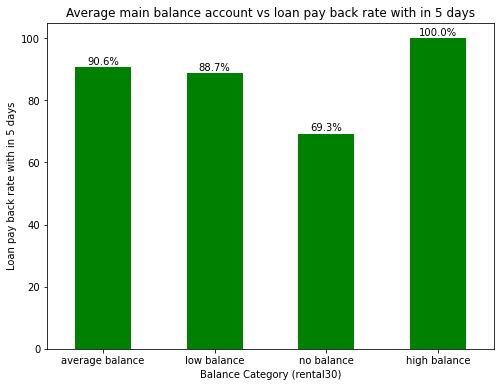

In [48]:
plot_balance = bal['% Subscription'].plot(kind = 'bar',
                                               color = ('green'),
                                               figsize = (8,6))

plt.title('Average main balance account vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Balance Category (rental30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

In [38]:
l = [eda_data]
for column in l:
    column.loc[column["amnt_loans30"] <=0,  'loanamnt_frequency_group'] = 'no loans'
    column.loc[(column['amnt_loans30'] > 0) & (column['amnt_loans30'] <=6 ), 'loanamnt_frequency_group'] = 'low amnt of loans'
    column.loc[(column['amnt_loans30'] >6) & (column['amnt_loans30'] <=24), 'loanamnt_frequency_group'] = 'medium amnt of loans'
    column.loc[(column['amnt_loans30'] >24), 'loanamnt_frequency_group'] = 'high amnt of loans'

In [39]:
count_loanamnt_response_pct = pd.crosstab(eda_data['label'],eda_data['loanamnt_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loanamnt_response_pct = count_loanamnt_response_pct.transpose()

In [40]:
fre1 = pd.DataFrame(eda_data['loanamnt_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre1['% Subscription'] = count_loanamnt_response_pct[1]
fre1.drop('loanamnt_frequency_group',axis = 1,inplace = True)

fre1['fre1'] = [1,2,0,3]
fre1= fre1.sort_values('fre1',ascending = True)

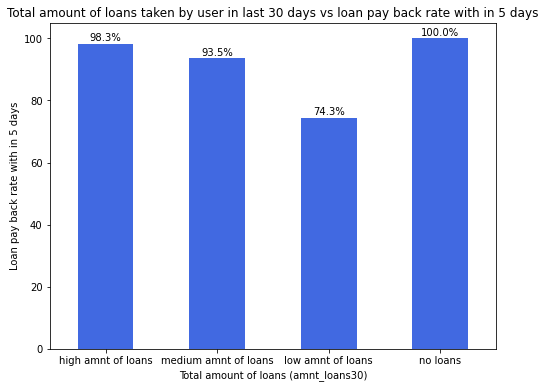

In [41]:
plot_fre1 = fre1['% Subscription'].plot(kind = 'bar',
                                               color = ('royalblue'), figsize = (8,6))

plt.title('Total amount of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Total amount of loans (amnt_loans30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre1.patches,
                      fre1['% Subscription'].round(1).astype(str)):
    plot_fre1.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

## Checking Correaltions

In [16]:
corr_data = data
corr = corr_data.corr()
corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


In [17]:
data.drop(['last_rech_date_da','fr_da_rech30','maxamnt_loans30','medianamnt_loans30','maxamnt_loans90','medianamnt_loans90','cnt_da_rech30','cnt_da_rech90','fr_da_rech90'],axis=1,inplace=True)

In [18]:
data['label']

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [19]:
data_copy = data.copy()
data_copy.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,21,3078,1539.0,7.50,2,12,2.0,12,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,0,5787,5787.0,61.04,1,12,1.0,12,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,0,1539,1539.0,66.32,1,6,1.0,6,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,0,947,947.0,2.50,2,12,2.0,12,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,2,23496,2888.0,35.00,7,42,7.0,42,2.333333,2.333333


In [20]:
data_copy = data_copy.drop(columns=['label'],axis=1)
print(data_copy.shape)

(209593, 23)


In [21]:
X1=data_copy
y1=data['label']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(146715, 23)
(62878, 23)
(146715,)
(62878,)


## Modelling

### Random Forest

### First Itertaion of the Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
RF_1 = RandomForestClassifier()
RF_1.fit(X_train, Y_train)

RandomForestClassifier()

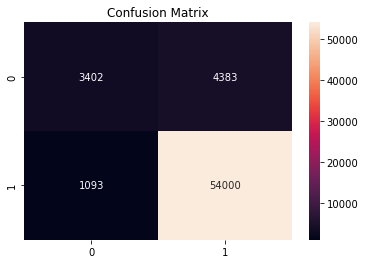

In [15]:
from sklearn.metrics import confusion_matrix
ypred = RF_1.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [16]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9129107159896943
Precision = 0.9249267766301834
Recall = 0.9801608189788177
F1 Score = 0.9517430998625259


ROC AUC = 0.8929172066976467


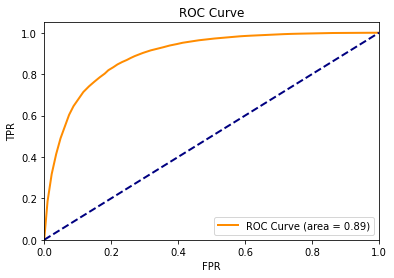

In [17]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = RF_1.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Second Itertaion of the Random Forest

In [18]:
RF_2 = RandomForestClassifier(n_estimators=150,random_state=8,n_jobs=-1)
RF_2.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=8)

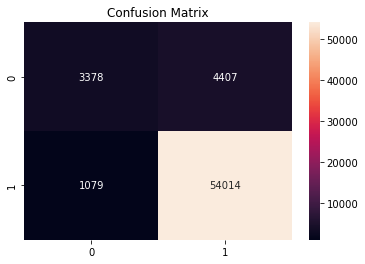

In [19]:
from sklearn.metrics import confusion_matrix
ypred = RF_2.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [20]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.912751677852349
Precision = 0.9245647969052224
Recall = 0.980414934746701
F1 Score = 0.9516711595045545


ROC AUC = 0.8955954572568897


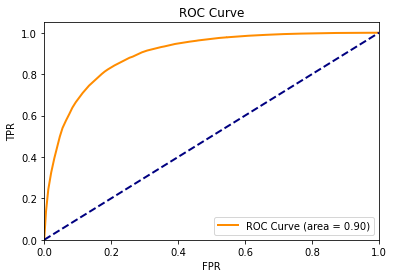

In [21]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = RF_2.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

# We define the model
nb = GaussianNB()

# We train model
nb.fit(X_train, Y_train)

GaussianNB()

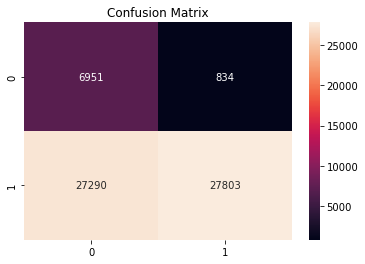

In [23]:
from sklearn.metrics import confusion_matrix
ypred = nb.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [24]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.5527211425299787
Precision = 0.9708768376575758
Recall = 0.5046557638901494
F1 Score = 0.664110832437597


ROC AUC = 0.7962324160672745


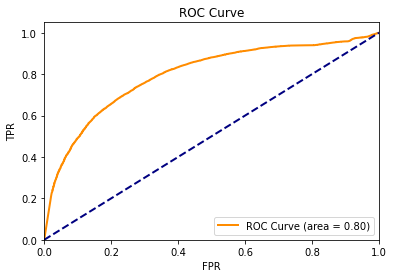

In [25]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = nb.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Gradient Boosting

### First Itertaion of the Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier()

# We train model
gbm_model.fit(X_train, Y_train)

GradientBoostingClassifier()

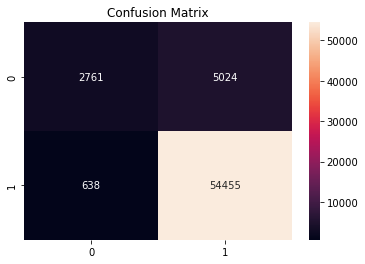

In [27]:
from sklearn.metrics import confusion_matrix
ypred = gbm_model.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [28]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.909952606635071
Precision = 0.9155332134030498
Recall = 0.9884195814350281
F1 Score = 0.9505812938588836


ROC AUC = 0.8864339508085359


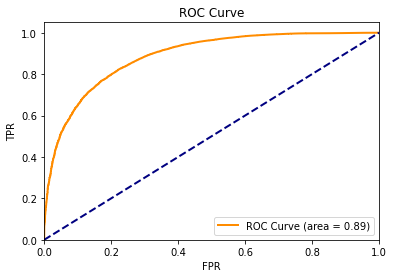

In [29]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = gbm_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Second Itertaion of the Gradient Boosting

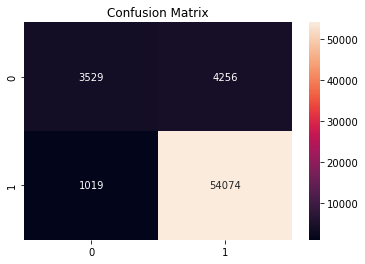

In [24]:
#Second Ieration

from sklearn.ensemble import GradientBoostingClassifier
gbm_model2 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=8, random_state=10)

# We train model
gbm_model2.fit(X_train, Y_train)

from sklearn.metrics import confusion_matrix
ypred = gbm_model2.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [25]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9161073825503355
Precision = 0.9270358306188925
Recall = 0.9815040023233441
F1 Score = 0.9534926778519347


ROC AUC = 0.9066060365423324


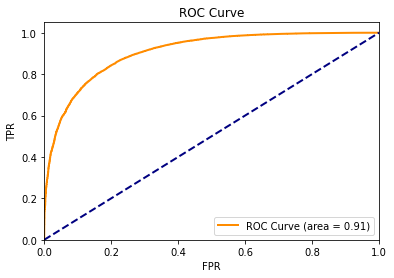

In [26]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = gbm_model2.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Light GBM

In [32]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()

# We train model
lgbm_model.fit(X_train, Y_train)

LGBMClassifier()

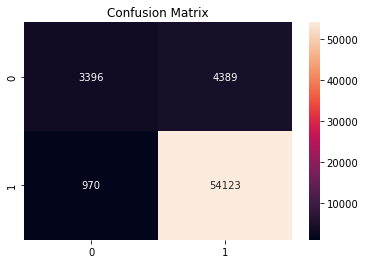

In [33]:
from sklearn.metrics import confusion_matrix
ypred = lgbm_model.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [34]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9147714621966347
Precision = 0.9249897456931911
Recall = 0.9823934075109361
F1 Score = 0.952827780467409


ROC AUC = 0.9051064026133612


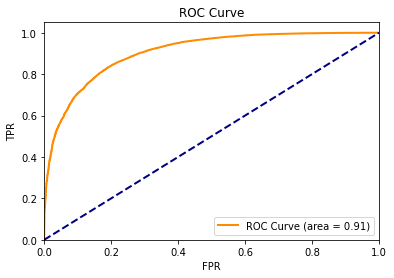

In [35]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = lgbm_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

# We train model
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

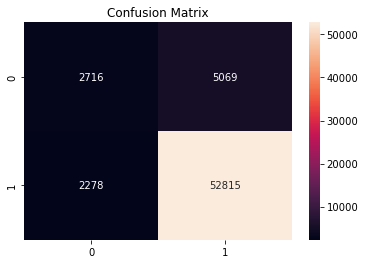

In [37]:
from sklearn.metrics import confusion_matrix
ypred = knn_model.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [38]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8831546804923821
Precision = 0.9124283048856333
Recall = 0.9586517343401159
F1 Score = 0.934969064499854


ROC AUC = 0.7779427408557407


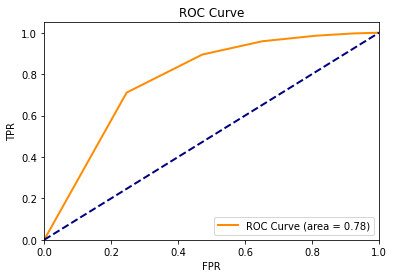

In [39]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = knn_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

### First Itertaion of the Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

# We train model
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

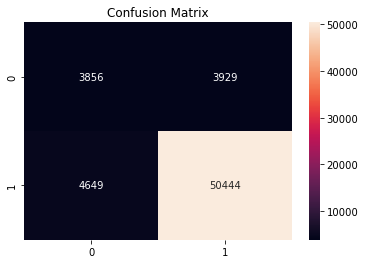

In [41]:
from sklearn.metrics import confusion_matrix
ypred = dt_model.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [42]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8635770857851713
Precision = 0.9277398708918029
Recall = 0.9156154139364348
F1 Score = 0.9216377688049257


ROC AUC = 0.7054571809976571


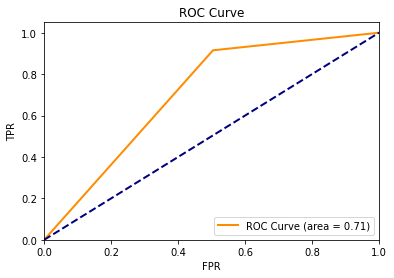

In [43]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = dt_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Second Itertaion of the Decision Tree

In [44]:
#Second Iteration

from sklearn.tree import DecisionTreeClassifier

dt_model2 = DecisionTreeClassifier(max_depth = 8, random_state = 42)

# We train model
dt_model2.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

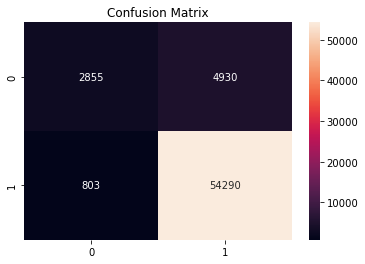

In [45]:
from sklearn.metrics import confusion_matrix
ypred = dt_model2.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [46]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9088234358599192
Precision = 0.9167510976021614
Recall = 0.9854246455992595
F1 Score = 0.9498482237365828


ROC AUC = 0.8669625137041294


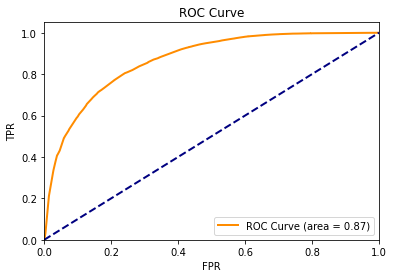

In [47]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = dt_model2.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()